# Construct deep architectures for CNN models


### **Description: Analyze percentage of dropout after every layer Interpret notation**


### Algorithm:

**--> Step 1:** Open preprocessed dataset  
**--> Step 2:** Convert classes vectors to binary matrices  
**--> Step 3:** Choose **percentage of dropout**  
**--> Step 4:** Visualize built CNN models  
**--> Step 5:** Set up learning rate & epochs  
**--> Step 6:** Train built CNN models  
**--> Step 7:** Show and plot accuracies  
**--> Step 8:** Make a conclusion  


**Result:**  
- Chosen architecture for every preprocessed dataset  


## Importing libraries

In [1]:
# Importing needed libraries
import matplotlib.pyplot as plt
import numpy as np
import h5py


from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import LearningRateScheduler


Using TensorFlow backend.


## Setting up full path to preprocessed datasets

In [3]:
# Full or absolute path to preprocessed datasets
full_path_to_code = \
    'C:/Users/yashs/PycharmProjects/InternshipCNN/TCS'


ERROR! Session/line number was not unique in database. History logging moved to new session 9


### RGB custom dataset (255.0 ==> mean ==> std)

## Opening preprocessed dataset

In [4]:
# Opening saved custom dataset from HDF5 binary file
# Initiating File object
# Opening file in reading mode by 'r'
with h5py.File(full_path_to_code + '/' + 'custom' + '/' + 
               'dataset_custom_rgb_255_mean_std.hdf5', 'r') as f:
    
    # Showing all keys in the HDF5 binary file
    print(list(f.keys()))
    
    # Extracting saved arrays for training by appropriate keys
    # Saving them into new variables
    x_train = f['x_train']  # HDF5 dataset
    y_train = f['y_train']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_train = np.array(x_train)  # Numpy arrays
    y_train = np.array(y_train)  # Numpy arrays
    
    
    # Extracting saved arrays for validation by appropriate keys
    # Saving them into new variables
    x_validation = f['x_validation']  # HDF5 dataset
    y_validation = f['y_validation']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_validation = np.array(x_validation)  # Numpy arrays
    y_validation = np.array(y_validation)  # Numpy arrays
    
    
    # Extracting saved arrays for testing by appropriate keys
    # Saving them into new variables
    x_test = f['x_test']  # HDF5 dataset
    y_test = f['y_test']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_test = np.array(x_test)  # Numpy arrays
    y_test = np.array(y_test)  # Numpy arrays


['x_test', 'x_train', 'x_validation', 'y_test', 'y_train', 'y_validation']


In [5]:
# Showing types of loaded arrays
print(type(x_train))
print(type(y_train))
print(type(x_validation))
print(type(y_validation))
print(type(x_test))
print(type(y_test))
print()


# Showing shapes of loaded arrays
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)
print(x_test.shape)
print(y_test.shape)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>

(3240, 64, 64, 3)
(3240,)
(1110, 64, 64, 3)
(1110,)
(278, 64, 64, 3)
(278,)


### RGB custom dataset (255.0 ==> mean ==> std)

## Converting classes vectors to classes matrices

In [6]:
# Showing class index from the vector
print('Class index from vector:', y_train[3])
print()

# Preparing classes to be passed into the model
# Transforming them from vectors to binary matrices
# It is needed to set relationship between classes to be understood by the algorithm
# Such format is commonly used in training and predicting
y_train = to_categorical(y_train, num_classes = 5)
y_validation = to_categorical(y_validation, num_classes = 5)


# Showing shapes of converted vectors into matrices
print(y_train.shape)
print(y_validation.shape)
print()


# Showing class index from the matrix
print('Class index from matrix:', y_train[3])


Class index from vector: 4

(3240, 5)
(1110, 5)

Class index from matrix: [0. 0. 0. 0. 1.]


### RGB custom dataset (255.0 ==> mean ==> std)

## Choosing percentage of dropout

In [7]:
# Building 5 models
# RGB --> {64C5-P2} --> {128C5-P2} --> {256C5-P2} --> {512C5-P2} --> 2048 --> 5
# RGB --> {64C5-P2-D10} --> {128C5-P2-D10} --> {256C5-P2-D10} --> {512C5-P2-D10} --> 2048-D10 --> 5
# RGB --> {64C5-P2-D20} --> {128C5-P2-D20} --> {256C5-P2-D20} --> {512C5-P2-D20} --> 2048-D20 --> 5
# RGB --> {64C5-P2-D30} --> {128C5-P2-D30} --> {256C5-P2-D30} --> {512C5-P2-D30} --> 2048-D30 --> 5
# RGB --> {64C5-P2-D40} --> {128C5-P2-D40} --> {256C5-P2-D40} --> {512C5-P2-D40} --> 2048-D40 --> 5


# Defining list to collect models in
model = []


# Building models in a loop
for i in range(5):
    # Initializing model to be as linear stack of layers
    temp = Sequential()

    # Adding first convolutional-pooling pair
    temp.add(Conv2D(64, kernel_size=5, padding='same', activation='relu', input_shape=(64, 64, 3)))
    temp.add(MaxPool2D())
    temp.add(Dropout(0.1 * i))

    # Adding second convolutional-pooling pair
    temp.add(Conv2D(128, kernel_size=5, padding='same', activation='relu'))
    temp.add(MaxPool2D())
    temp.add(Dropout(0.1 * i))

    # Adding third convolutional-pooling pair
    temp.add(Conv2D(256, kernel_size=5, padding='same', activation='relu'))
    temp.add(MaxPool2D())
    temp.add(Dropout(0.1 * i))

    # Adding fourth convolutional-pooling pair
    temp.add(Conv2D(512, kernel_size=5, padding='same', activation='relu'))
    temp.add(MaxPool2D())
    temp.add(Dropout(0.1 * i))

    # Adding fully connected layers
    temp.add(Flatten())
    temp.add(Dense(2048, activation='relu'))
    temp.add(Dropout(0.1 * i))
    temp.add(Dense(5, activation='softmax'))

    # Compiling created model
    temp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Adding current model in the list
    model.append(temp)


# Check point
print('5 models are compiled successfully')


5 models are compiled successfully


### RGB custom dataset (255.0 ==> mean ==> std)

## Visualizing built CNN models

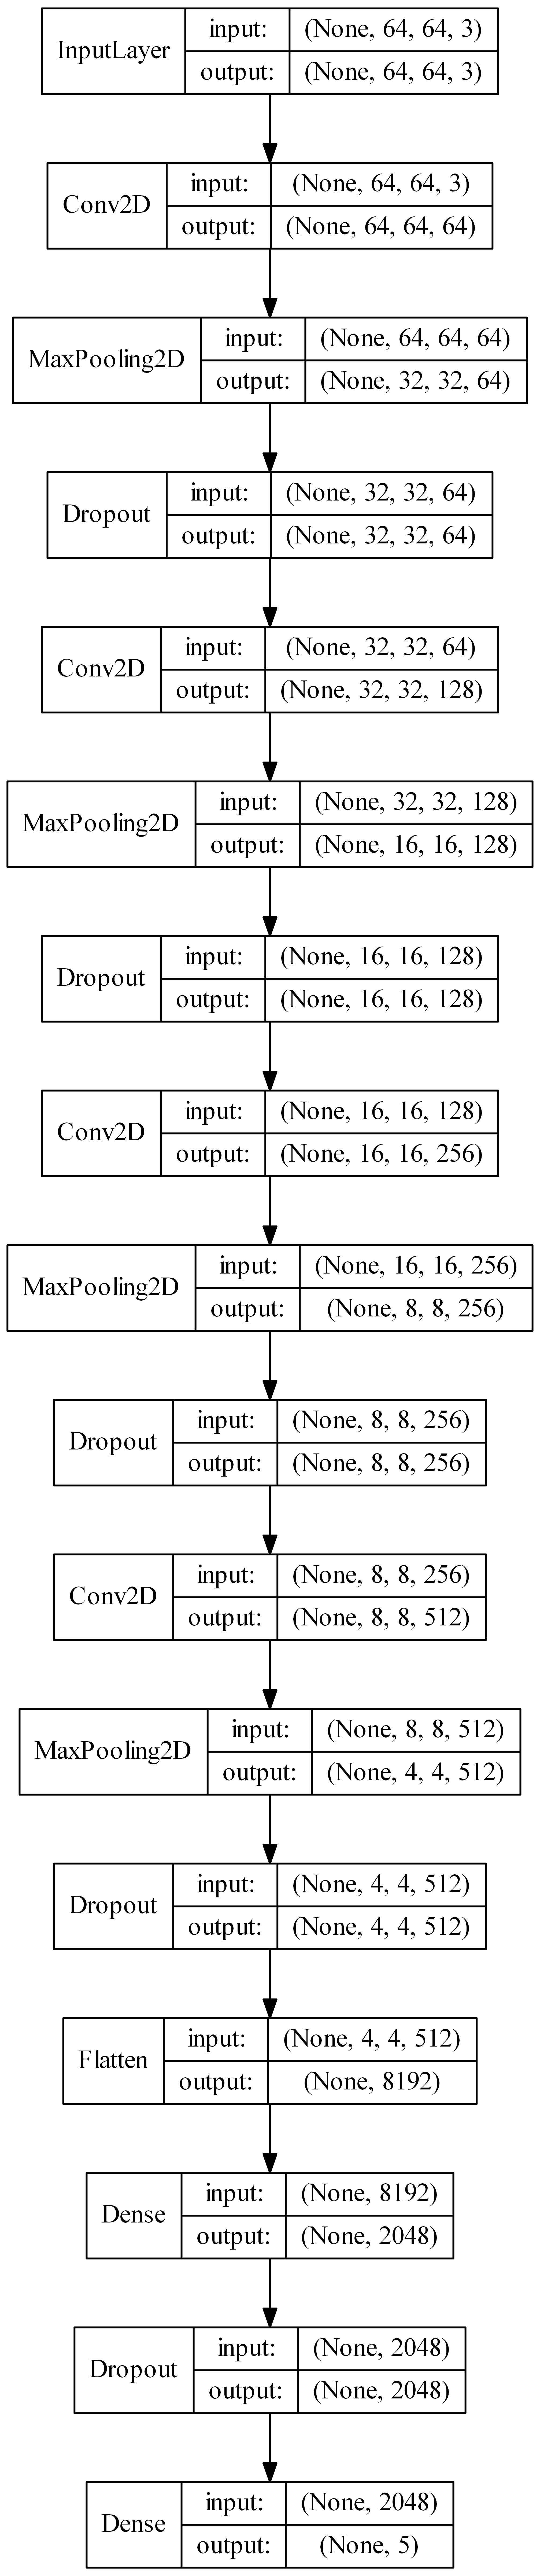

In [8]:
# Plotting model's layers in form of flowchart
plot_model(model[4],
           to_file='model.png',
           show_shapes=True,
           show_layer_names=False,
           rankdir='TB',
           dpi=500)


In [ ]:
# Showing model's summary in form of table
model[4].summary()


In [ ]:
# Showing dropout rate
model[4].layers[2].rate


### RGB custom dataset (255.0 ==> mean ==> std)

## Setting up learning rate & epochs

In [9]:
# Defining number of epochs
epochs = 20

# Defining schedule to update learning rate
learning_rate = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x + epochs), verbose=1)

# Check point
print('Number of epochs and schedule for learning rate are set successfully')


Number of epochs and schedule for learning rate are set successfully


### RGB custom dataset (255.0 ==> mean ==> std)

## Training built CNN models

In [10]:
# Defining list to collect results in
h = []


# Training models in a loop
for i in range(5):
    # Current model
    temp = model[i].fit(x_train, y_train,
                        batch_size=50,
                        epochs=epochs,
                        validation_data=(x_validation, y_validation),
                        callbacks=[learning_rate],
                        verbose=1)
    
    # Adding results of current model in the list
    h.append(temp)


Train on 3240 samples, validate on 1110 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.0003584859224085419.
3240/3240 [==============================] - 71s 22ms/step - loss: 1.3328 - accuracy: 0.4213 - val_loss: 1.1618 - val_accuracy: 0.4910
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0003405616262881148.
3240/3240 [==============================] - 70s 22ms/step - loss: 1.0609 - accuracy: 0.5454 - val_loss: 1.0190 - val_accuracy: 0.5703
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.000323533544973709.
3240/3240 [==============================] - 67s 21ms/step - loss: 0.9477 - accuracy: 0.6037 - val_loss: 0.9207 - val_accuracy: 0.6135
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.00030735686772502356.
3240/3240 [==============================] - 62s 19ms/step - loss: 0.8264 - accuracy: 0.6488 - val_loss: 0.8911 - val_accuracy: 0.6054
Epoch 5/20

Epoch 00005: Learnin

Epoch 16/20

Epoch 00016: LearningRateScheduler setting learning rate to 0.00016608338398760718.
3240/3240 [==============================] - 64s 20ms/step - loss: 0.0279 - accuracy: 0.9938 - val_loss: 1.5937 - val_accuracy: 0.6622
Epoch 17/20

Epoch 00017: LearningRateScheduler setting learning rate to 0.0001577792147882268.
3240/3240 [==============================] - 63s 20ms/step - loss: 0.0187 - accuracy: 0.9960 - val_loss: 1.8205 - val_accuracy: 0.6595
Epoch 18/20

Epoch 00018: LearningRateScheduler setting learning rate to 0.00014989025404881545.
3240/3240 [==============================] - 63s 20ms/step - loss: 0.0098 - accuracy: 0.9991 - val_loss: 1.8773 - val_accuracy: 0.6613
Epoch 19/20

Epoch 00019: LearningRateScheduler setting learning rate to 0.00014239574134637466.
3240/3240 [==============================] - 66s 20ms/step - loss: 0.0053 - accuracy: 0.9991 - val_loss: 1.9983 - val_accuracy: 0.6658
Epoch 20/20

Epoch 00020: LearningRateScheduler setting learning rate to 

3240/3240 [==============================] - 65s 20ms/step - loss: 0.5638 - accuracy: 0.7642 - val_loss: 0.8515 - val_accuracy: 0.6793
Epoch 12/20

Epoch 00012: LearningRateScheduler setting learning rate to 0.00020390682574579038.
3240/3240 [==============================] - 67s 21ms/step - loss: 0.5035 - accuracy: 0.8015 - val_loss: 0.7877 - val_accuracy: 0.6946
Epoch 13/20

Epoch 00013: LearningRateScheduler setting learning rate to 0.00019371148445850088.
3240/3240 [==============================] - 65s 20ms/step - loss: 0.4381 - accuracy: 0.8290 - val_loss: 0.8612 - val_accuracy: 0.6712
Epoch 14/20

Epoch 00014: LearningRateScheduler setting learning rate to 0.00018402591023557584.
3240/3240 [==============================] - 65s 20ms/step - loss: 0.3618 - accuracy: 0.8596 - val_loss: 0.8898 - val_accuracy: 0.6838
Epoch 15/20

Epoch 00015: LearningRateScheduler setting learning rate to 0.000174824614723797.
3240/3240 [==============================] - 65s 20ms/step - loss: 0.3090 

### RGB custom dataset (255.0 ==> mean ==> std)

## Showing and plotting accuracies

In [11]:
# Accuracies of the models
for i in range(5):
    print('Model {0}: Training accuracy={1:.5f}, Validation accuracy={2:.5f}'.
                                                         format(i + 1,
                                                                max(h[i].history['accuracy']),
                                                                max(h[i].history['val_accuracy'])))


Model 1: Training accuracy=1.00000, Validation accuracy=0.68559
Model 2: Training accuracy=0.99907, Validation accuracy=0.67027
Model 3: Training accuracy=0.99321, Validation accuracy=0.68378
Model 4: Training accuracy=0.96420, Validation accuracy=0.69459
Model 5: Training accuracy=0.87346, Validation accuracy=0.69279


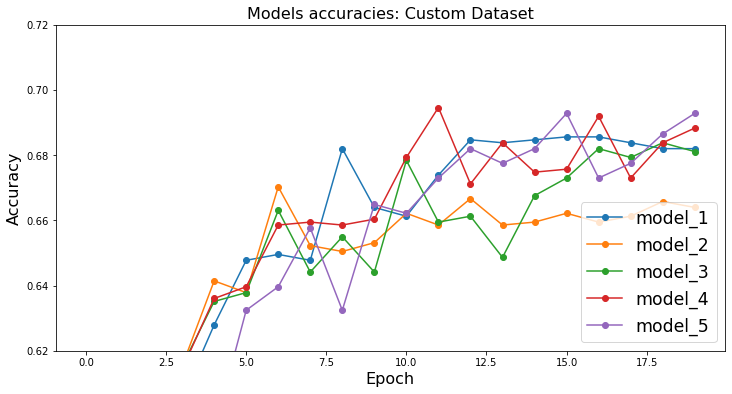

In [12]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12.0, 6.0)


# Plotting accuracies for every model
plt.plot(h[0].history['val_accuracy'], '-o')
plt.plot(h[1].history['val_accuracy'], '-o')
plt.plot(h[2].history['val_accuracy'], '-o')
plt.plot(h[3].history['val_accuracy'], '-o')
plt.plot(h[4].history['val_accuracy'], '-o')


# Setting limit along Y axis
plt.ylim(0.62, 0.72)


# Showing legend
plt.legend(['model_1', 'model_2', 'model_3', 'model_4', 'model_5'],
           loc='lower right',
           fontsize='xx-large')


# Giving name to axes
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)


# Giving name to the plot
plt.title('Models accuracies: Custom Dataset', fontsize=16)


# Showing the plot
plt.show()


In [13]:
# Showing list of scheduled learning rate for every epoch
print(h[0].history['lr'])


[0.00035848594, 0.00034056162, 0.00032353355, 0.00030735688, 0.000291989, 0.00027738957, 0.0002635201, 0.00025034408, 0.00023782688, 0.00022593554, 0.00021463877, 0.00020390682, 0.00019371149, 0.0001840259, 0.00017482461, 0.00016608338, 0.00015777921, 0.00014989026, 0.00014239574, 0.00013527596]


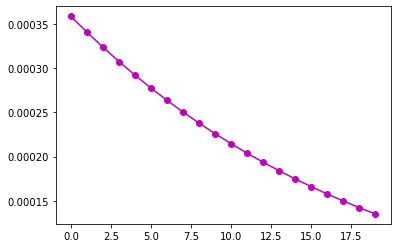

In [14]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Plotting scheduled learning rate
plt.plot(h[0].history['lr'], '-mo')


# Showing the plot
plt.show()


### RGB custom dataset (255.0 ==> mean ==> std)

## Step 8: Making a conclusion

In [ ]:
# According to validation accuracy, the 3rd model has the highest value

# The choice for custom dataset is 3rd model
# RGB input --> {64C5-P2-D20} --> {128C5-P2-D20} --> {256C5-P2-D20} --> {512C5-P2-D20} --> 2048-D20 --> 5
# GRAY input --> {64C5-P2-D20} --> {128C5-P2-D20} --> {256C5-P2-D20} --> {512C5-P2-D20} --> 2048-D20 --> 5

# RGB input: (64, 64, 3)
# GRAY input: (64, 64, 1)
